<a href="https://colab.research.google.com/github/smccracken13/DataScienceCareerTrack/blob/main/(McCracken)_NBA_All_Star_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [122]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/smccracken13/NBA-All-Star-Prediction-Project/main/nba_data_cleaned.csv')
df.shape

(22462, 57)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       22462 non-null  int64  
 1   seas_id          22462 non-null  int64  
 2   season           22462 non-null  int64  
 3   player_id        22462 non-null  int64  
 4   player           22462 non-null  object 
 5   pos              22462 non-null  object 
 6   age              22462 non-null  float64
 7   experience       22462 non-null  int64  
 8   tm               22462 non-null  object 
 9   g                22462 non-null  int64  
 10  mp               22462 non-null  float64
 11  per              22462 non-null  float64
 12  ts_percent       22462 non-null  float64
 13  x3p_ar           22462 non-null  float64
 14  f_tr             22462 non-null  float64
 15  orb_percent      22462 non-null  float64
 16  drb_percent      22462 non-null  float64
 17  trb_percent 

In [125]:
df.describe()

,Unnamed: 0,seas_id,season,player_id,age,experience,g,mp,per,ts_percent,...,trb,ast,stl,blk,tov,pf,pts,attend,tm_win_percent,seas_avg_attend
count,22462.00000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,...,22462.000000,22462.000000,22462.000000,22462.000000,22462.00000,22462.000000,22462.000000,2.246200e+04,22462.000000,22462.000000
mean,11233.55329,19223.470706,2003.392663,3144.307319,26.708574,5.398139,48.065533,1119.580670,12.427135,0.506266,...,197.621717,107.194729,37.119090,23.163298,68.95459,102.958552,473.226204,6.290815e+05,0.493509,629082.292545
std,6486.38312,6486.394282,12.196331,869.850159,4.025907,3.885731,26.696112,906.078862,6.403949,0.104959,...,198.338887,133.910092,36.656747,34.849715,65.28934,79.176517,472.506627,1.718946e+05,0.147450,141149.866691
min,0.00000,7991.000000,1980.000000,834.000000,18.000000,1.000000,1.000000,1.000000,-90.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.817000e+03,0.106061,58864.784787
25%,5615.25000,13606.250000,1993.000000,2428.000000,24.000000,2.000000,24.000000,290.000000,9.600000,0.475000,...,44.000000,16.000000,8.000000,3.000000,16.00000,32.000000,89.000000,5.607340e+05,0.390244,574509.304569
50%,11235.50000,19221.500000,2004.000000,3147.500000,26.000000,4.000000,52.000000,938.000000,12.600000,0.520000,...,139.000000,59.000000,27.000000,11.000000,50.00000,92.000000,325.000000,6.635000e+05,0.500000,689369.407895
75%,16850.75000,24841.750000,2014.000000,3832.750000,29.000000,8.000000,74.000000,1818.750000,15.700000,0.557000,...,285.000000,146.000000,55.000000,28.000000,105.00000,161.000000,728.000000,7.364610e+05,0.597561,712764.487226
max,22466.00000,30457.000000,2022.000000,5024.000000,44.000000,22.000000,85.000000,3533.000000,133.800000,1.500000,...,1530.000000,1164.000000,301.000000,456.000000,464.00000,386.000000,3041.000000,1.072572e+06,0.890244,736547.361983


In [126]:
df.columns

Index(['Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'pos', 'age',
       'experience', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend'],
      dtype='object')

## Plot histograms of each feature

In [127]:
# create function to speed up plotting
def hist_list(list):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(20,4))
  for i in range(len(list)):
    sns.histplot(data=df, x=list[i], ax=ax[i])
  plt.show()

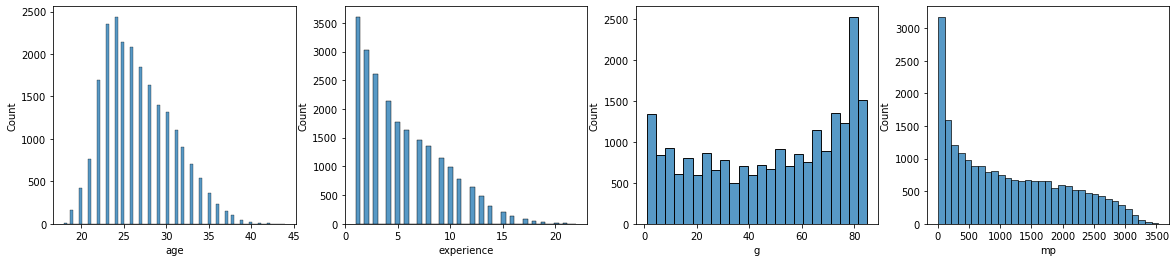

In [128]:
# plot age, experience, games and minutes played columns
hist_list(['age','experience','g','mp'])

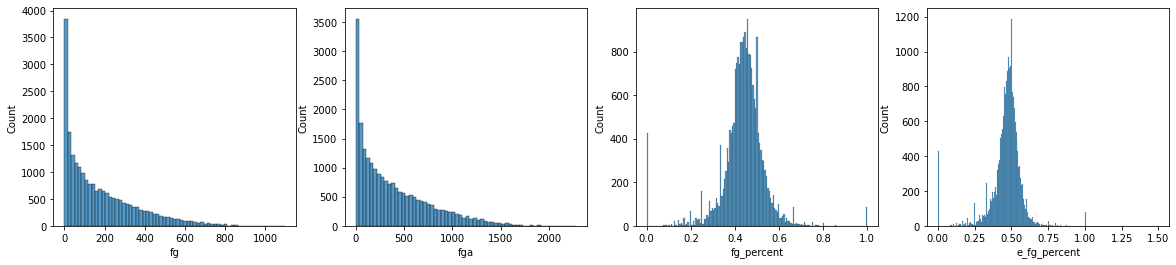

In [129]:
# plot field goal stats
hist_list(['fg', 'fga', 'fg_percent','e_fg_percent'])

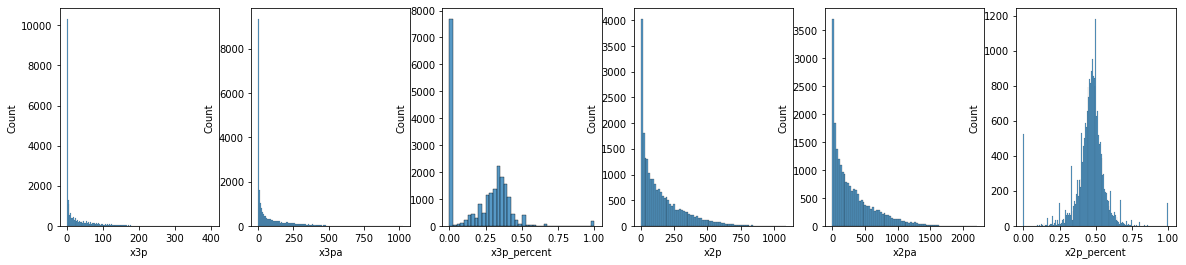

In [130]:
# plot 3-point and 2-point stats
hist_list(['x3p', 'x3pa', 'x3p_percent','x2p', 'x2pa', 'x2p_percent'])

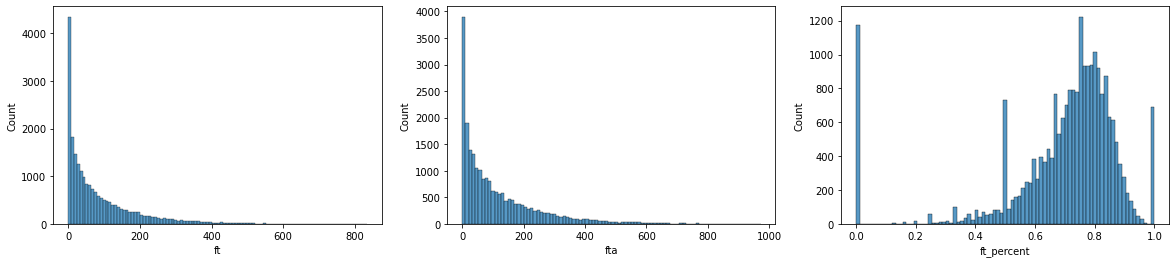

In [131]:
# plot free-throw stats
hist_list(['ft', 'fta', 'ft_percent'])

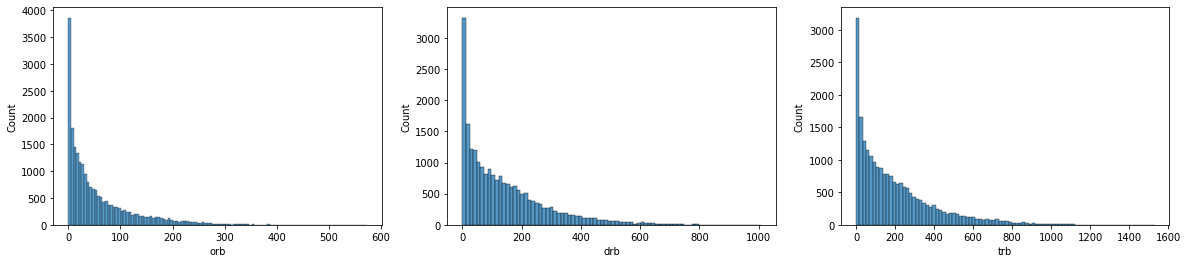

In [132]:
# plot rebound stats
hist_list(['orb', 'drb','trb'])

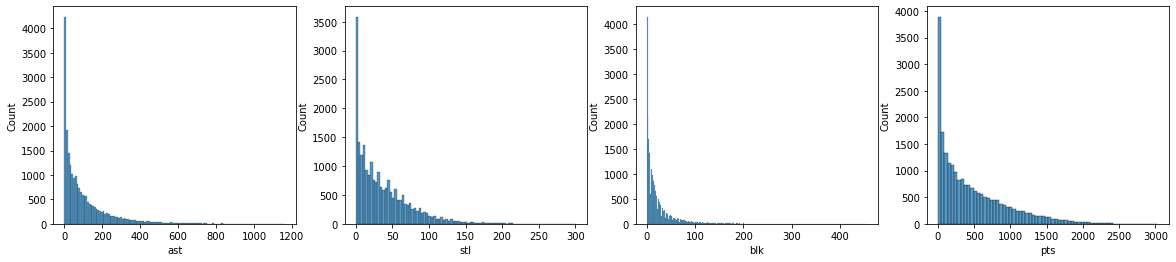

In [133]:
# plot assist, steals, blocks, points
hist_list(['ast', 'stl', 'blk', 'pts'])

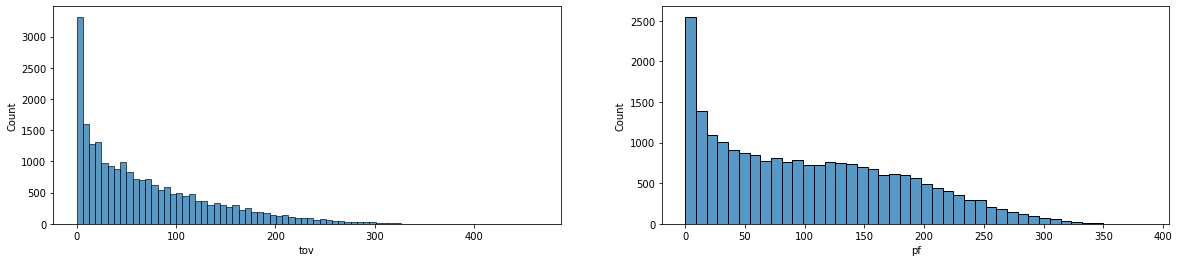

In [134]:
# plot turnovers and personal fouls
hist_list(['tov','pf'])

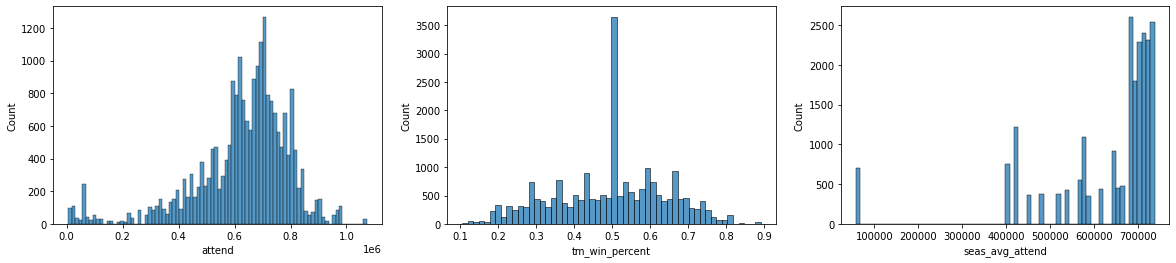

In [135]:
# plot team stats: win%, attendance, season average attendance
hist_list(['attend','tm_win_percent', 'seas_avg_attend'])

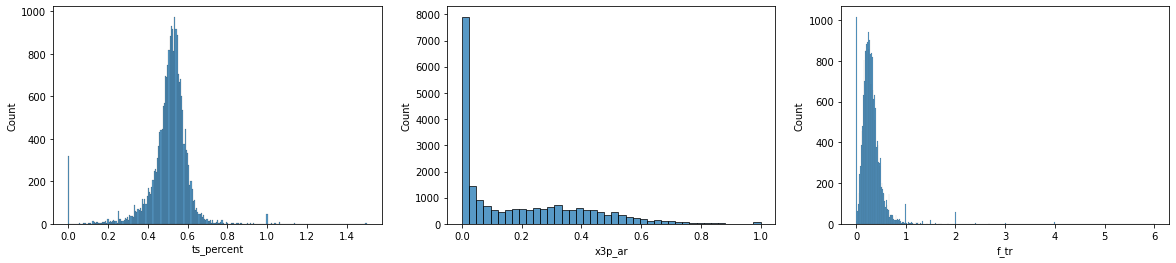

In [136]:
# plot advanced shooting stats: true shooting, 3-point, free-throw
advanced_stats = ['per', 'ts_percent', 'x3p_ar', 'f_tr',
                  'orb_percent', 'drb_percent', 'trb_percent',
                  'ast_percent','stl_percent', 'blk_percent', 'tov_percent', 'usg_percent',
                  'ows','dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp']
hist_list(['ts_percent', 'x3p_ar', 'f_tr'])

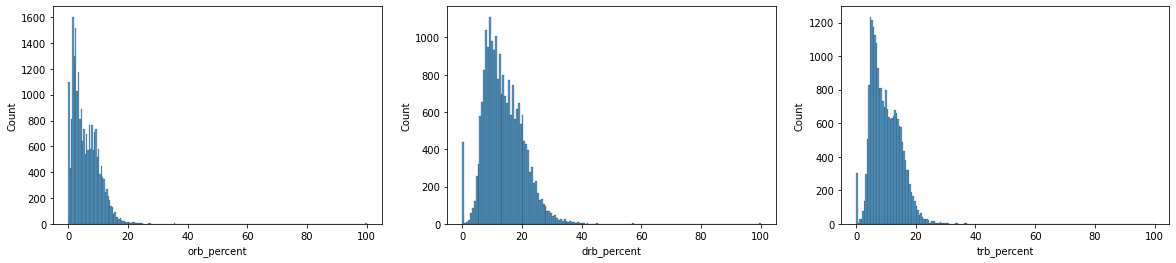

In [137]:
# plot advanced rebounding stats
hist_list(['orb_percent', 'drb_percent', 'trb_percent'])

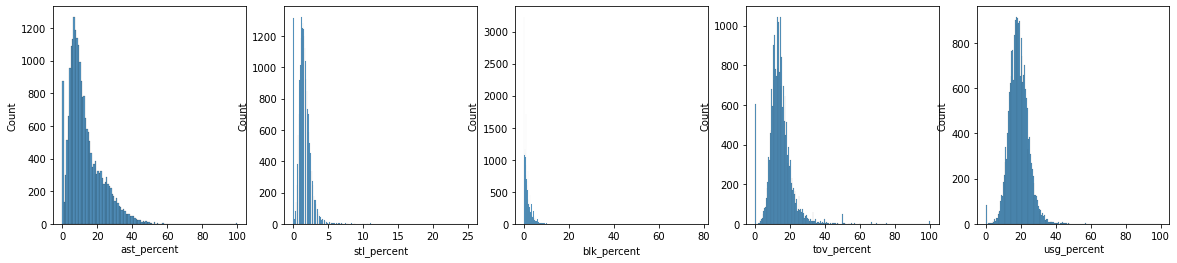

In [138]:
# plot advanced assists, steals, blocks, turnovers, usage
hist_list(['ast_percent','stl_percent', 'blk_percent', 'tov_percent', 'usg_percent'])

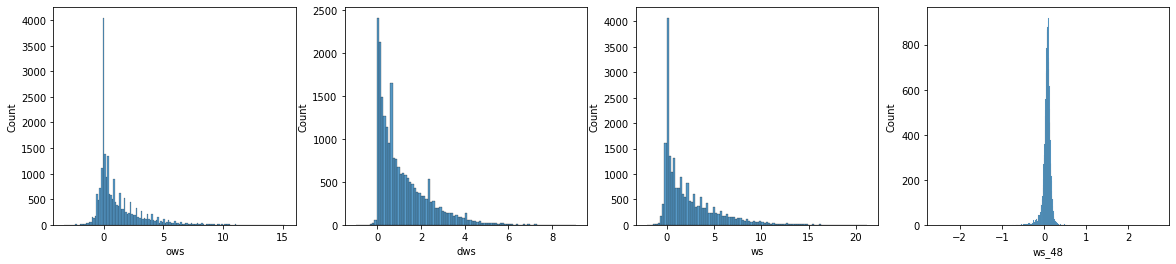

In [139]:
# plot win share stats
hist_list(['ows','dws', 'ws', 'ws_48'])

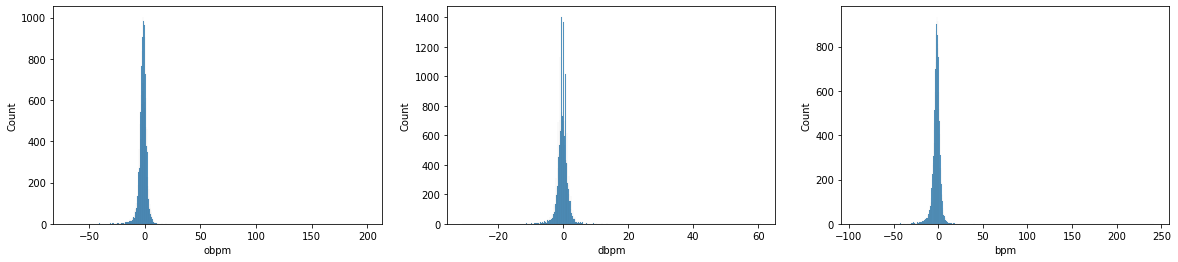

In [140]:
# plot box plus/minus stats
hist_list(['obpm', 'dbpm', 'bpm'])

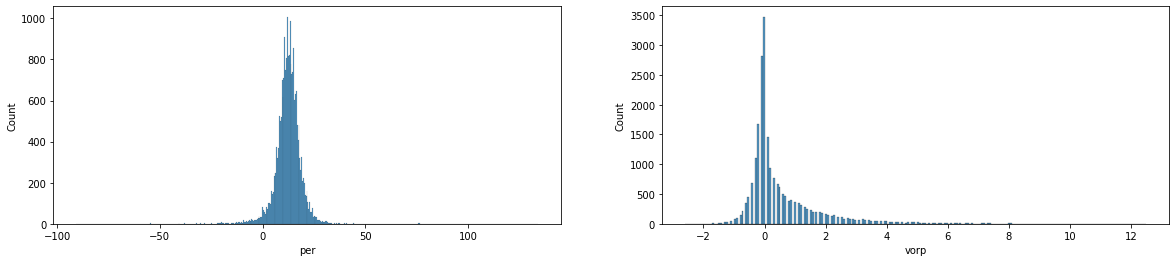

In [141]:
# plot player-efficiency-rating and value-over-replacement
hist_list(['per','vorp'])

## Correlations

In [142]:
# plot correlation of each feature to all-star category
df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star'].sort_values(ascending=False)

all_star          1.000000
vorp              0.602410
ows               0.518466
ws                0.517736
ft                0.483435
fta               0.482038
pts               0.435907
fg                0.417619
x2p               0.414321
dws               0.393920
fga               0.392234
x2pa              0.391810
tov               0.372618
drb               0.343201
ast               0.336303
trb               0.319658
stl               0.314016
mp                0.294956
per               0.286000
usg_percent       0.257286
blk               0.255477
obpm              0.252839
bpm               0.241232
orb               0.237952
ws_48             0.206694
pf                0.192545
ast_percent       0.181400
x3pa              0.171049
x3p               0.164673
g                 0.164283
tm_win_percent    0.159223
ts_percent        0.110419
dbpm              0.103794
fg_percent        0.096902
drb_percent       0.090350
x2p_percent       0.086537
e_fg_percent      0.085358
e

In [143]:
#sns.pairplot(df)

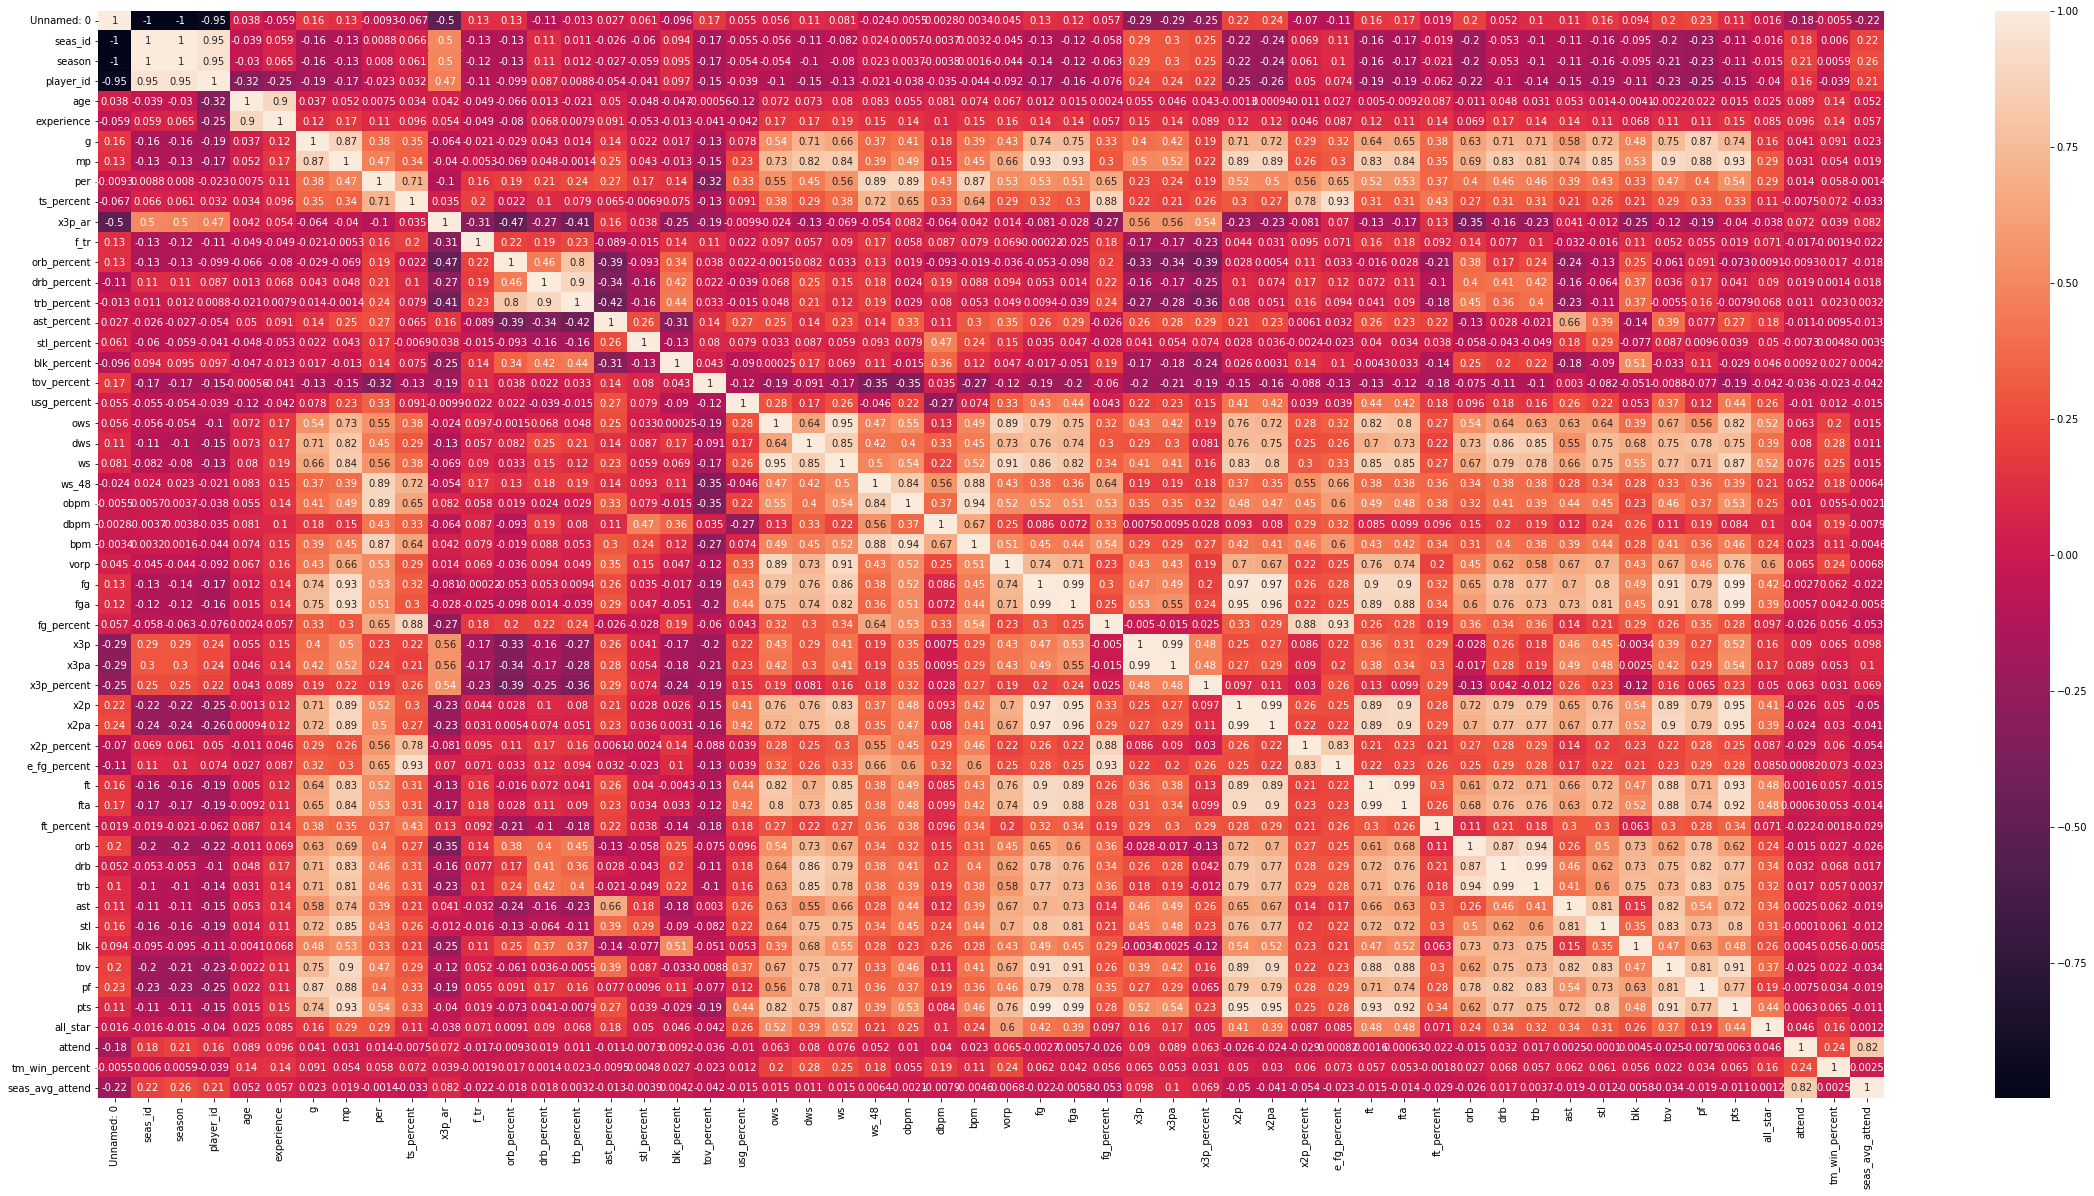

In [144]:
# heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

## Simplifying categories

In [145]:
# based on the .corr()['all_star'], I am going to remove some columns that seem unimportant
# trim down to only win share
# trim down to only box plus/minus
# trim down to only total rebound
df = df.drop(['ows','dws','obpm','dbpm','orb','drb','ws_48'],axis=1)
# check correlation again
df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star'].sort_values(ascending=False)

all_star          1.000000
vorp              0.602410
ws                0.517736
ft                0.483435
fta               0.482038
pts               0.435907
fg                0.417619
x2p               0.414321
fga               0.392234
x2pa              0.391810
tov               0.372618
ast               0.336303
trb               0.319658
stl               0.314016
mp                0.294956
per               0.286000
usg_percent       0.257286
blk               0.255477
bpm               0.241232
pf                0.192545
ast_percent       0.181400
x3pa              0.171049
x3p               0.164673
g                 0.164283
tm_win_percent    0.159223
ts_percent        0.110419
fg_percent        0.096902
drb_percent       0.090350
x2p_percent       0.086537
e_fg_percent      0.085358
experience        0.084568
f_tr              0.071154
ft_percent        0.070722
trb_percent       0.067991
stl_percent       0.049713
x3p_percent       0.049642
attend            0.046338
b

In [146]:
# Identify columns that have a very low linear correlation to all-star
correlations = df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star']
low_corr_columns = correlations[correlations <=0.1]
print(low_corr_columns)

age             0.024680
experience      0.084568
x3p_ar         -0.037667
f_tr            0.071154
orb_percent     0.009085
drb_percent     0.090350
trb_percent     0.067991
stl_percent     0.049713
blk_percent     0.045955
tov_percent    -0.042212
fg_percent      0.096902
x3p_percent     0.049642
x2p_percent     0.086537
e_fg_percent    0.085358
ft_percent      0.070722
attend          0.046338
Name: all_star, dtype: float64


In [147]:
# drop those low correlation columns
df = df.drop(low_corr_columns.index, axis=1)
# check correlations again
df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star'].sort_values(ascending=False)

all_star          1.000000
vorp              0.602410
ws                0.517736
ft                0.483435
fta               0.482038
pts               0.435907
fg                0.417619
x2p               0.414321
fga               0.392234
x2pa              0.391810
tov               0.372618
ast               0.336303
trb               0.319658
stl               0.314016
mp                0.294956
per               0.286000
usg_percent       0.257286
blk               0.255477
bpm               0.241232
pf                0.192545
ast_percent       0.181400
x3pa              0.171049
x3p               0.164673
g                 0.164283
tm_win_percent    0.159223
ts_percent        0.110419
Name: all_star, dtype: float64

## Boxplots against 'All-Star'

In [148]:
# create function to speed up plotting
def boxplot_list(list):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(20,4))
  for i in range(len(list)):
    sns.boxplot(data=df, y=list[i], x='all_star', ax=ax[i]).set_title(list[i])
  plt.show()
# convert 'all_star' to 0/1 instead of T/f
df.all_star = df.all_star.replace({True: 1, False: 0})

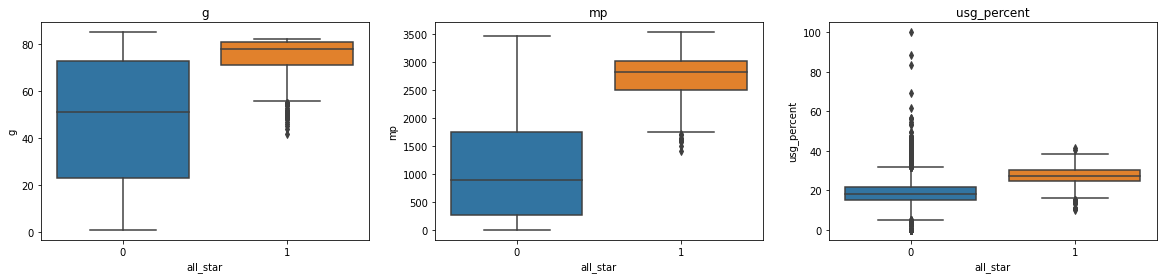

In [149]:
# plot games and minutes played, and usage
boxplot_list(['g','mp','usg_percent'])

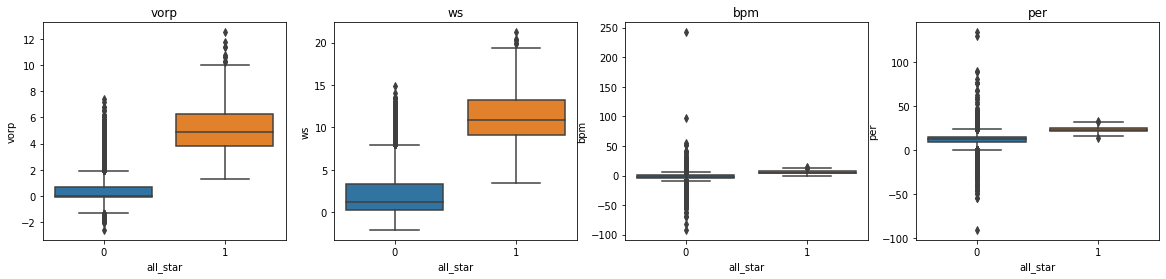

In [150]:
# plot vorp, win-share, box plus/minus, per
boxplot_list(['vorp','ws','bpm','per'])

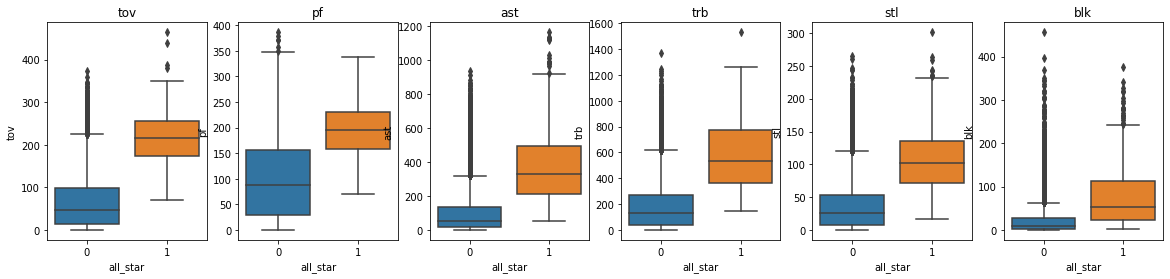

In [151]:
# plot turnovers, personal fouls, assists, rebounds, steals, blocks
boxplot_list(['tov','pf','ast','trb','stl','blk',])

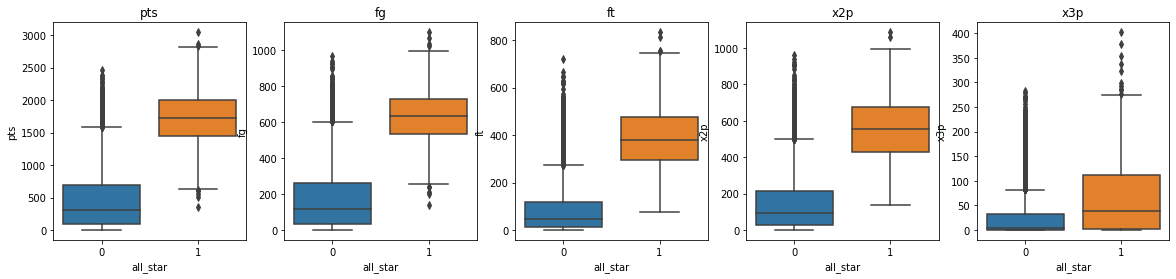

In [152]:
# plot scoring
boxplot_list(['pts','fg','ft','x2p','x3p'])

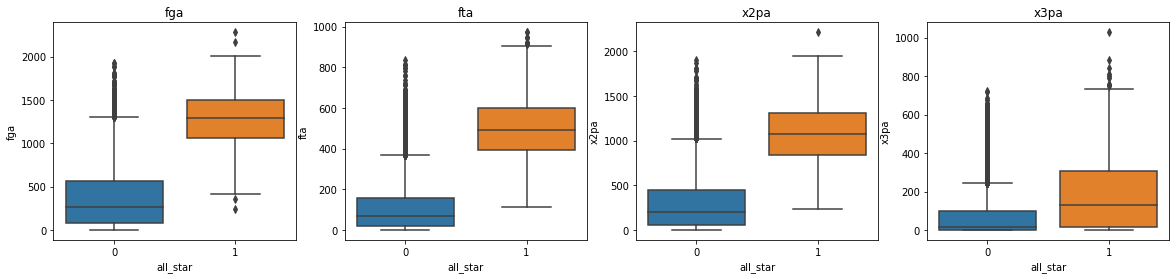

In [153]:
# plot shot attempts
boxplot_list(['fga','fta','x2pa','x3pa'])

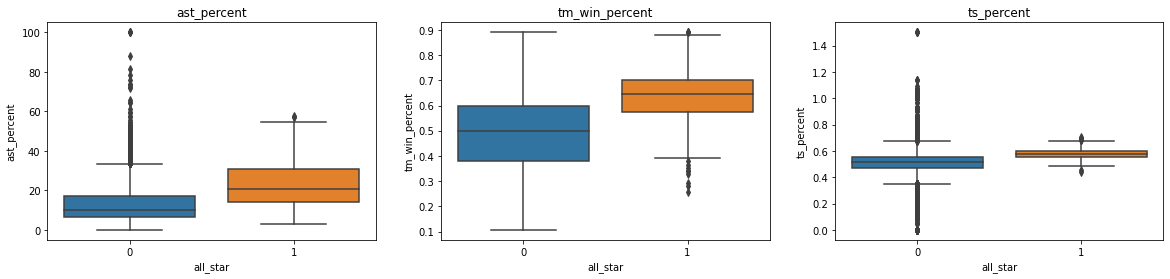

In [154]:
# plot assist%, team win%, true shooting
boxplot_list(['ast_percent', 'tm_win_percent','ts_percent'])

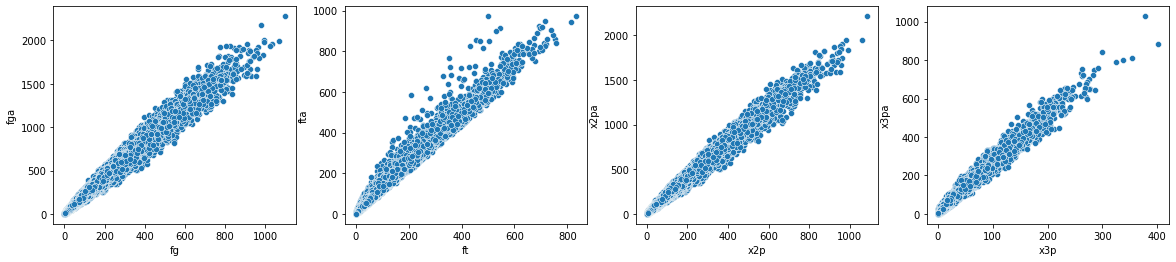

In [155]:
#'attempt' stats seem redundant with totals, especially since we saw shooting accuracy wasn't highly correlated with all-star category
# check correlation between attempt stats and their relevant totals
fig, ax =plt.subplots(1,4, figsize=(20,4))
sns.scatterplot(data=df, x='fg', y='fga', ax=ax[0])
sns.scatterplot(data=df, x='ft', y='fta', ax=ax[1])
sns.scatterplot(data=df, x='x2p', y= 'x2pa', ax=ax[2])
sns.scatterplot(data=df, x='x3p', y= 'x3pa', ax=ax[3])

In [156]:
# drop the attempt stats
df = df.drop(['fta','fga','x2pa','x3pa'],axis=1)

In [157]:
# check correlations again
df.drop(['seas_id','season','player_id','Unnamed: 0','seas_avg_attend'],axis=1).corr()['all_star'].sort_values(ascending=False)

all_star          1.000000
vorp              0.602410
ws                0.517736
ft                0.483435
pts               0.435907
fg                0.417619
x2p               0.414321
tov               0.372618
ast               0.336303
trb               0.319658
stl               0.314016
mp                0.294956
per               0.286000
usg_percent       0.257286
blk               0.255477
bpm               0.241232
pf                0.192545
ast_percent       0.181400
x3p               0.164673
g                 0.164283
tm_win_percent    0.159223
ts_percent        0.110419
Name: all_star, dtype: float64

I am down to 21 features that each seem to contribute something different, although there is some overlap. For example, points and field goals are very similar, vorp and win-share are similar, and vorp is based off of box plus/minus.

I am curious to see how a model  using only vorp compares to multivariable regressions.

Some other questions that popped into my head (but I probably won't explore) are how do these predictors differ for different positions? I would expect rebounds to matter more for centers in terms of all-star selection compared to point guards, for example. How have these predictors changed over time? I was suprised three-point shooting did not seem to be very correlated, and I wonder if it has become more important in the last 10 years than it was 30 years ago.

In terms of techinical questions, I am wondering if I need to scale the data before modeling. That is a process that I do not fully understand yet.